In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics,model_selection
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import scipy.stats as stats

In [ ]:
df_hol = pd.read_csv('Holiday_Package.csv')

In [ ]:
df_hol.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [ ]:
df_hol.shape

(872, 8)

In [ ]:
df_hol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [ ]:
df_hol.describe(include ='all')

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,no,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,471,NaN,NaN,NaN,NaN,NaN,656
mean,436.500000,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,251.869014,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,1.000000,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,218.750000,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,436.500000,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,654.250000,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [ ]:
df_hol.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
dups = df_hol.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
for column in df_hol.columns:
    if df_hol[column].dtype == 'object':
        print(column.upper(),': ',df_hol[column].nunique())
        print(df_hol[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [ ]:
df_hol.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

Text(0.5, 1.0, 'no_older_children Data')

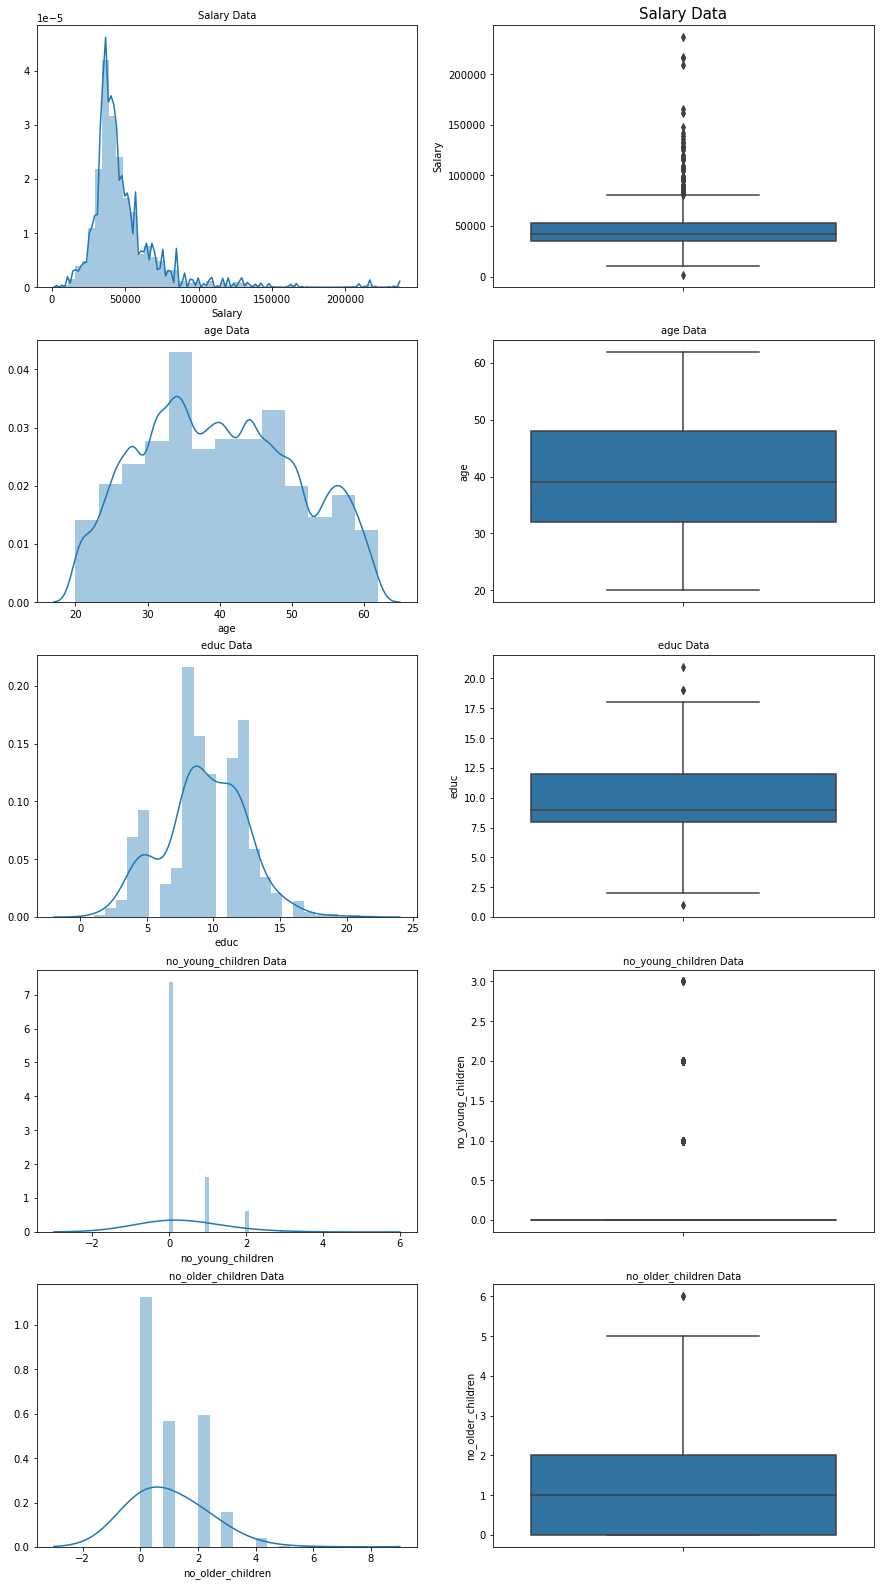

In [ ]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 28)

a = sns.distplot(df_hol['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Data",fontsize=10)

a = sns.boxplot(df_hol['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Data",fontsize=15)

a = sns.distplot(df_hol['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Data",fontsize=10)

a = sns.boxplot(df_hol['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Data",fontsize=10)

a = sns.distplot(df_hol['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Data",fontsize=10)

a = sns.boxplot(df_hol['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Data",fontsize=10)

a = sns.distplot(df_hol['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Data",fontsize=10)

a = sns.boxplot(df_hol['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Data",fontsize=10)

a = sns.distplot(df_hol['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Data",fontsize=10)

a = sns.boxplot(df_hol['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Data",fontsize=10)

In [ ]:
df_hol.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [ ]:
df_hol.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

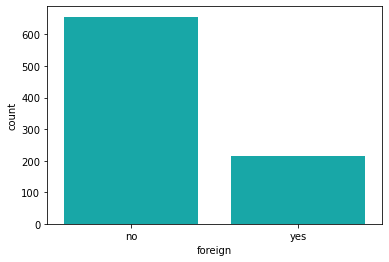

In [ ]:
sns.countplot(x="foreign", data=df_hol, color="c")

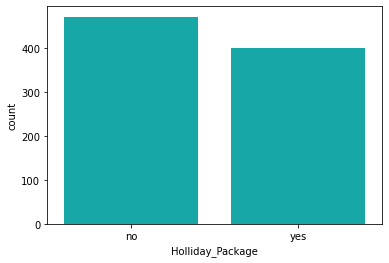

In [ ]:
sns.countplot(x="Holliday_Package", data=df_hol, color="c")

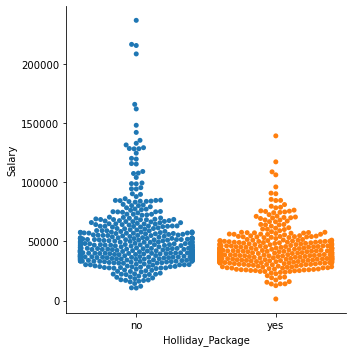

In [ ]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=df_hol)

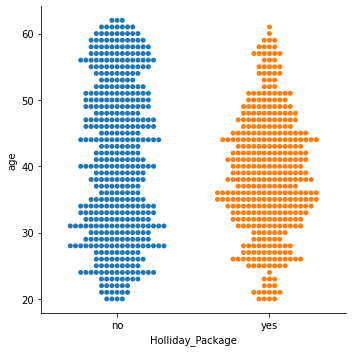

In [ ]:
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=df_hol)

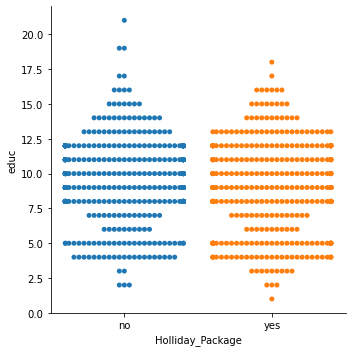

In [ ]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=df_hol)

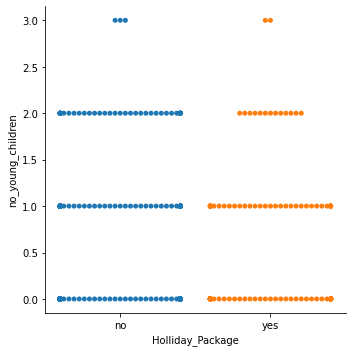

In [ ]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df_hol)

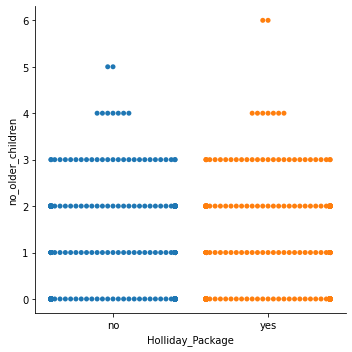

In [ ]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df_hol)

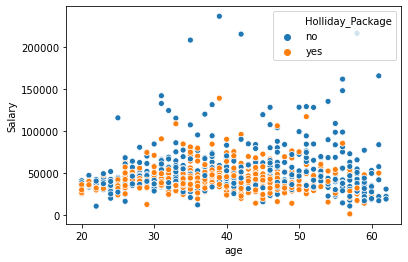

In [ ]:
sns.scatterplot(data = df_hol, x='age',y='Salary', hue = 'Holliday_Package')

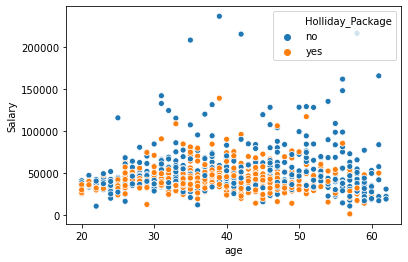

In [ ]:
sns.scatterplot(x="age", y="Salary", hue="Holliday_Package", data=df_hol)

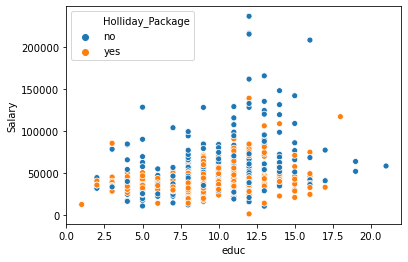

In [ ]:
sns.scatterplot(x="educ", y="Salary", hue="Holliday_Package", data=df_hol)

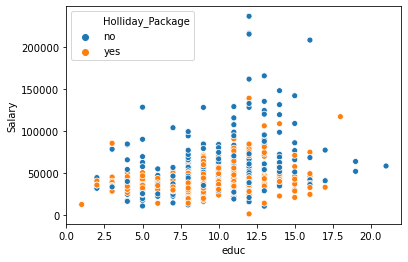

In [ ]:
sns.scatterplot(data = df_hol, x='educ',y='Salary', hue = 'Holliday_Package')

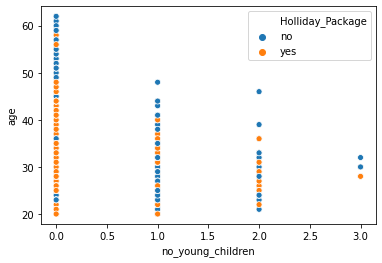

In [ ]:
sns.scatterplot(data = df_hol, x='no_young_children',y='age', hue = 'Holliday_Package')

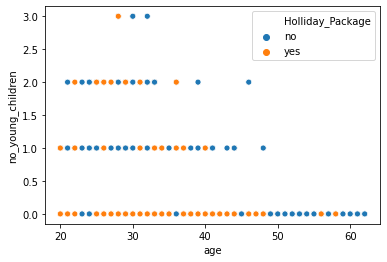

In [ ]:
sns.scatterplot(x="age", y="no_young_children", hue="Holliday_Package", data=df_hol)

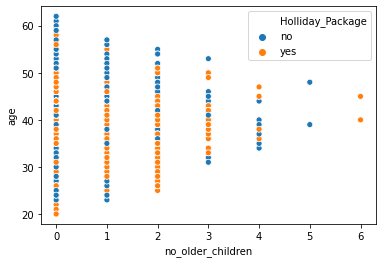

In [ ]:
sns.scatterplot(data = df_hol, x='no_older_children',y='age', hue = 'Holliday_Package')

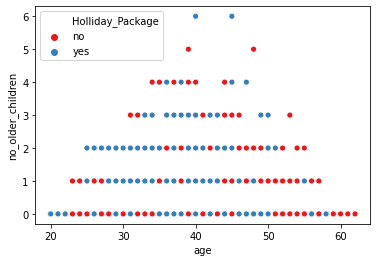

In [ ]:
sns.scatterplot(x="age", y="no_older_children", hue="Holliday_Package", data=df_hol,palette="Set1")

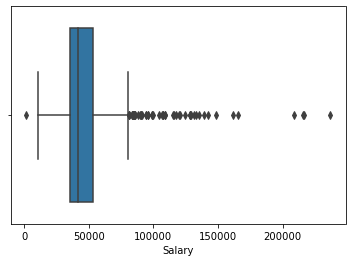

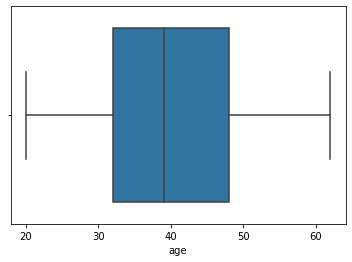

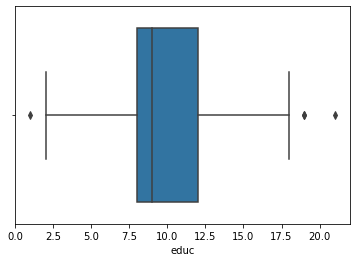

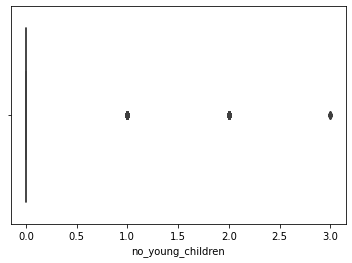

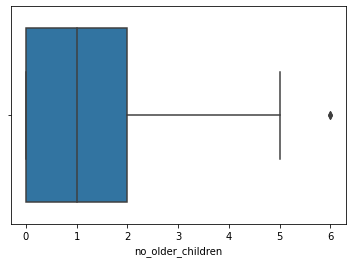

In [ ]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df_hol[i])
    plt.show()

In [ ]:
df_hol.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

D:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


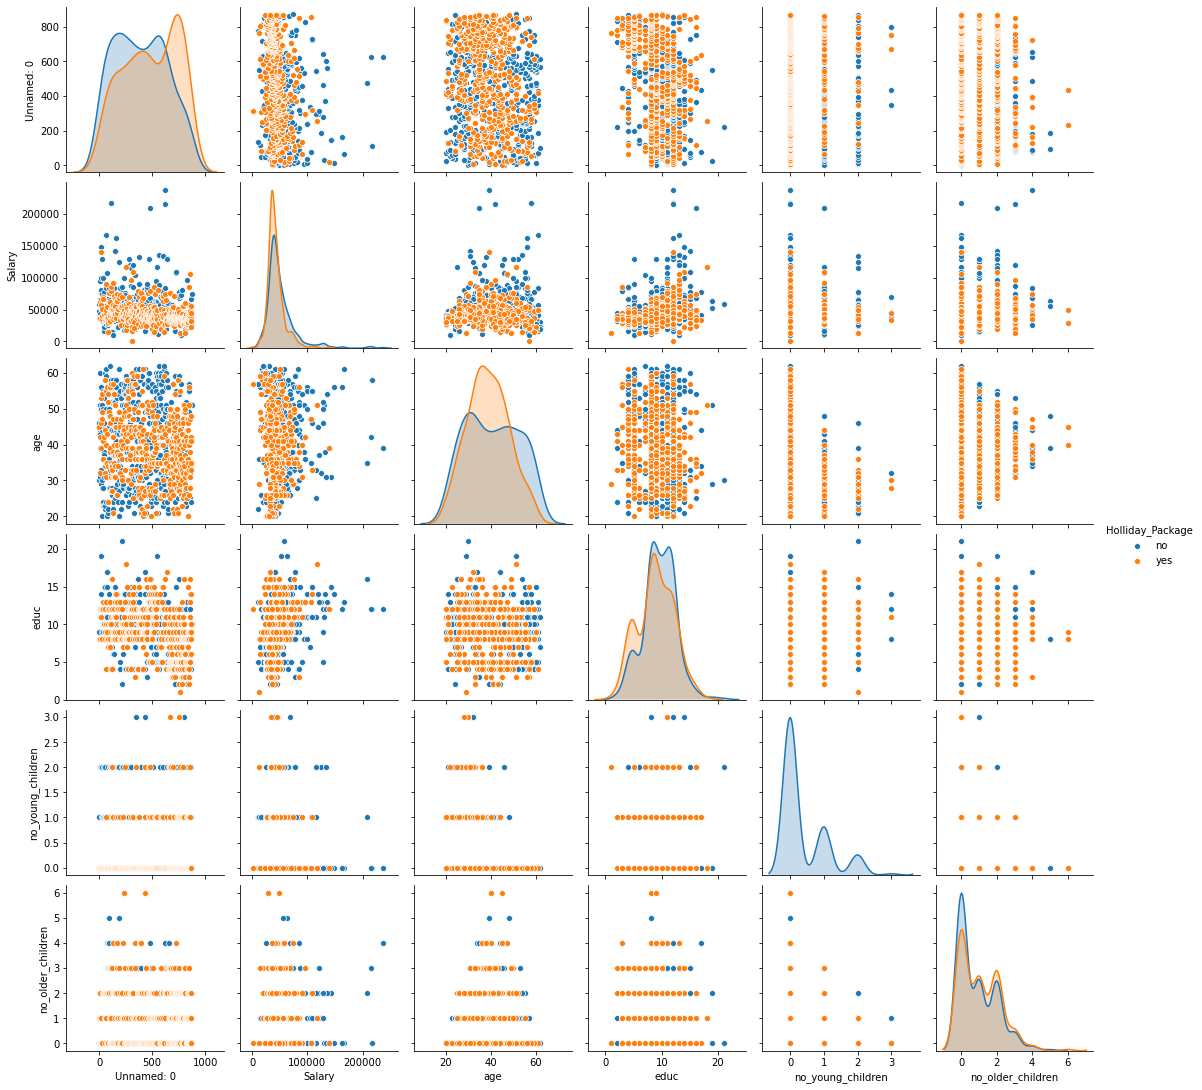

In [ ]:
sns.pairplot(df_hol ,diag_kind='kde' ,hue='Holliday_Package');

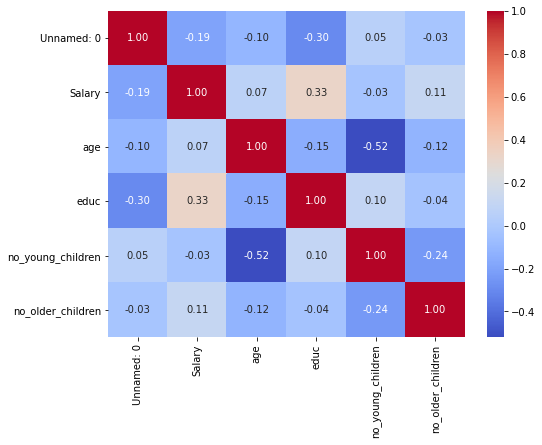

In [ ]:
df_cor = df_hol.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [ ]:
df_hol.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
cont=df_hol.dtypes[(df_hol.dtypes!='uint8') & (df_hol.dtypes!='object')].index

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df_hol[cont].columns:
    lr,ur=remove_outlier(df_hol[column])
    df_hol[column]=np.where(df_hol[column]>ur,ur,df_hol[column])
    df_hol[column]=np.where(df_hol[column]<lr,lr,df_hol[column])

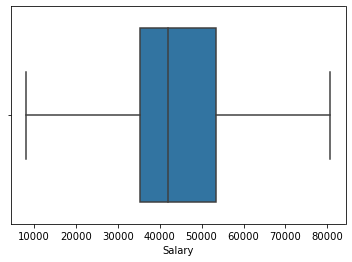

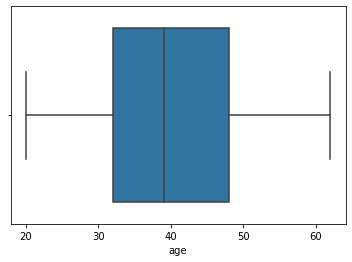

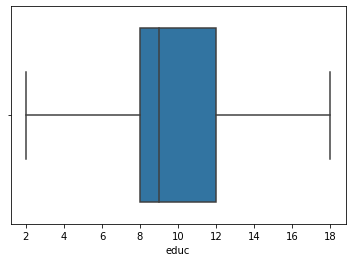

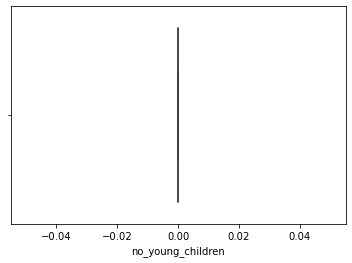

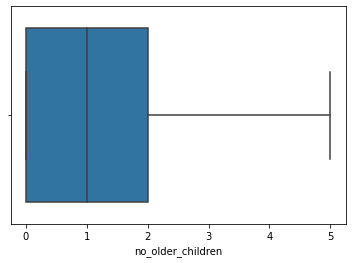

In [ ]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df_hol[i])
    plt.show()

In [ ]:
#dropping the column which is useless for us
df1 = df_hol.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
data = df1.copy()

In [ ]:
data = pd.get_dummies(data, columns=['Holliday_Package','foreign'], drop_first = True)

In [ ]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [ ]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

In [ ]:
X = data.drop('Holliday_Package_yes', axis=1)

y = data['Holliday_Package_yes']

In [ ]:
print(X.shape)
print(y.shape)

(872, 6)
(872,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(610, 6)
(262, 6)
(610,)
(262,)


In [ ]:
y_train.value_counts(1)

0    0.534426
1    0.465574
Name: Holliday_Package_yes, dtype: float64

In [ ]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [ ]:
model = LogisticRegression(max_iter=200000,n_jobs=2)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [ ]:
grid_search.fit(X_train, y_train)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=200000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=200000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-06)


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [ ]:
ytrain_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [ ]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.694134,0.305866
1,0.338427,0.661573
2,0.614057,0.385943
3,0.685491,0.314509
4,0.359433,0.640567


              precision    recall  f1-score   support

           0       0.63      0.82      0.71       326
           1       0.68      0.45      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 



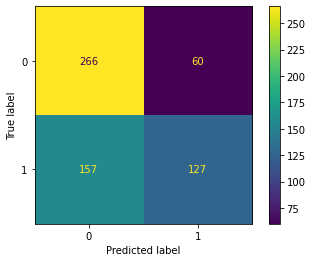

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



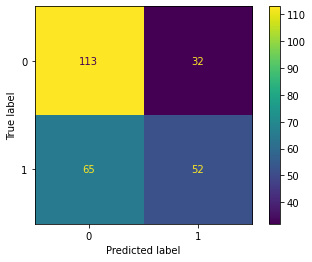

In [ ]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [ ]:
lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6442622950819672

In [ ]:
lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6297709923664122

AUC: 0.666


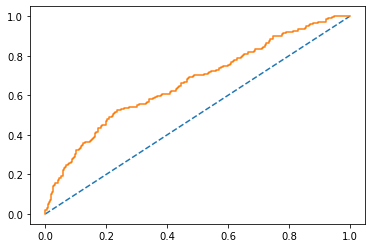

In [ ]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [ ]:
lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6297709923664122

AUC: 0.662


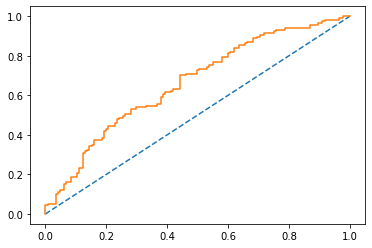

In [ ]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.68
lr_train_recall  0.45
lr_train_f1  0.54


In [ ]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.62
lr_test_recall  0.44
lr_test_f1  0.52


In [ ]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [ ]:
df1.shape

(872, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
for feature in df1.columns:
    if df1[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


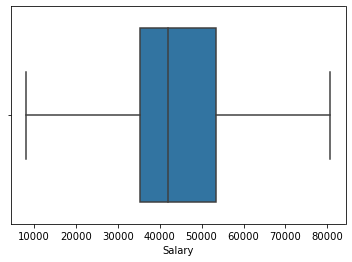

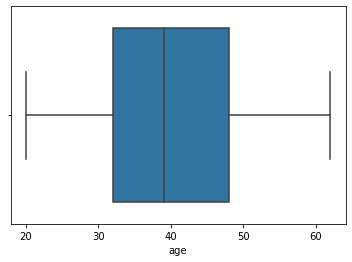

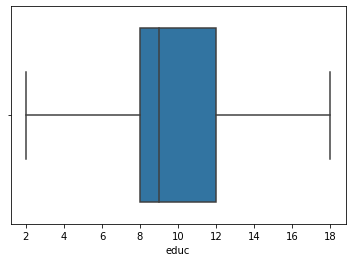

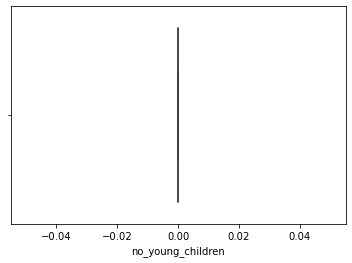

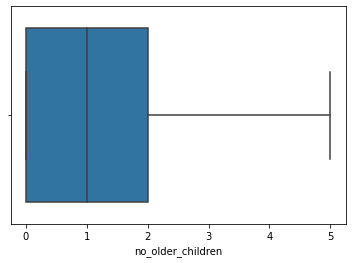

In [ ]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int8   
dtypes: float64(5), int8(2)
memory usage: 35.9 KB


In [ ]:
X = df1.drop('Holliday_Package',axis=1)
Y = df1.pop('Holliday_Package')

In [ ]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [ ]:
pred_class_train = model.predict(X_train)

pred_class_test = model.predict(X_test)

In [ ]:
pred_prob_train = model.predict_proba(X_train)

pred_prob_test = model.predict_proba(X_test)

In [ ]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [ ]:
confusion_matrix(Y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

In [ ]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6564885496183206

In [ ]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [ ]:
confusion_matrix(Y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


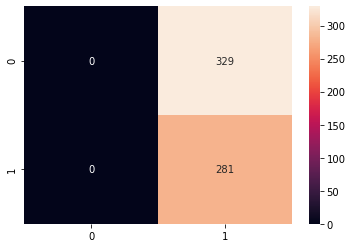

0.15 

Accuracy Score 0.4623
F1 Score 0.6315 

Confusion Matrix


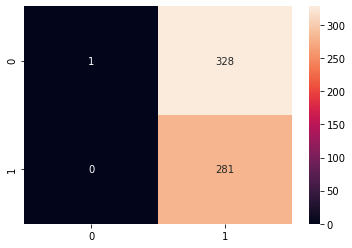

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


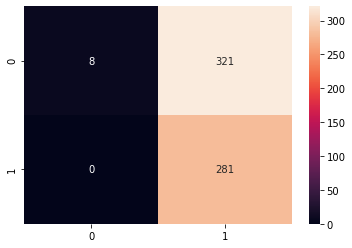

0.25 

Accuracy Score 0.4951
F1 Score 0.6385 

Confusion Matrix


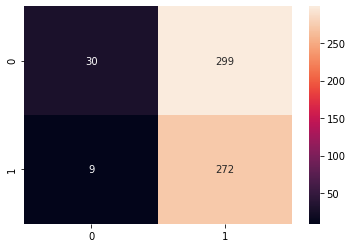

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


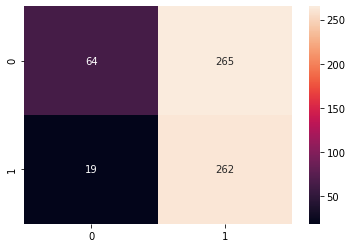

0.35 

Accuracy Score 0.5508
F1 Score 0.6267 

Confusion Matrix


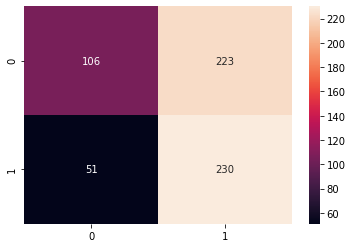

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


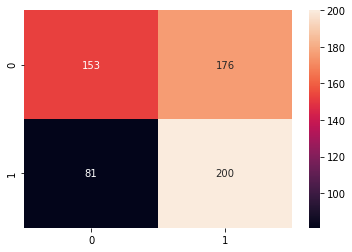

0.45 

Accuracy Score 0.6066
F1 Score 0.5699 

Confusion Matrix


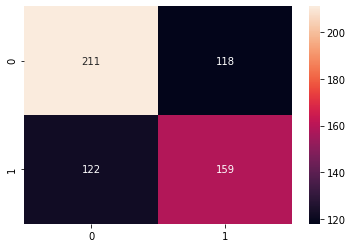

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


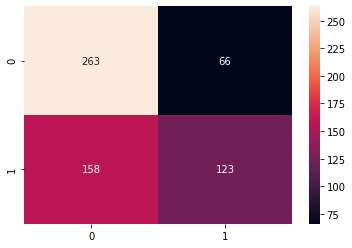

0.55 

Accuracy Score 0.6213
F1 Score 0.4714 

Confusion Matrix


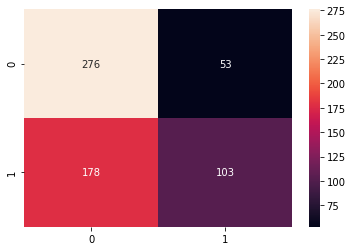

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


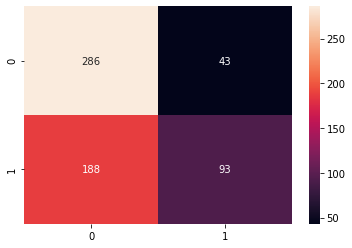

0.65 

Accuracy Score 0.6131
F1 Score 0.3949 

Confusion Matrix


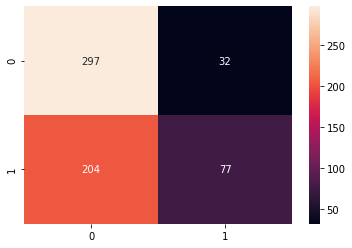

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


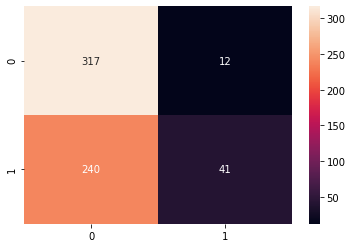

0.75 

Accuracy Score 0.5492
F1 Score 0.0614 

Confusion Matrix


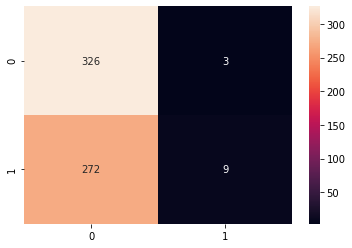

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


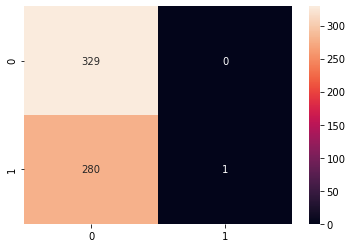

0.85 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


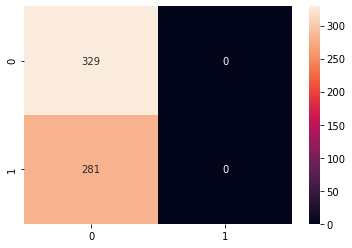

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


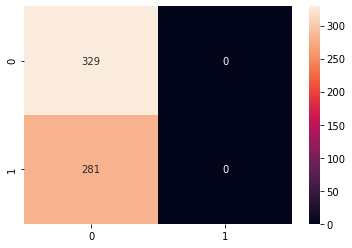

0.95 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


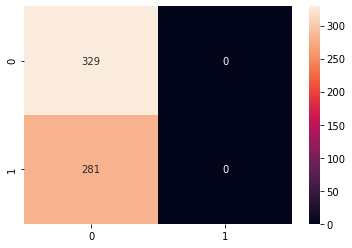

In [ ]:
for j in np.arange(0.1,1,0.05):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

0.1 

Accuracy Score 0.458
F1 Score 0.6283 

Confusion Matrix


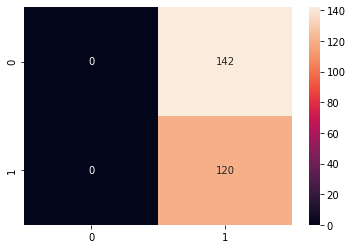

0.15 

Accuracy Score 0.458
F1 Score 0.6283 

Confusion Matrix


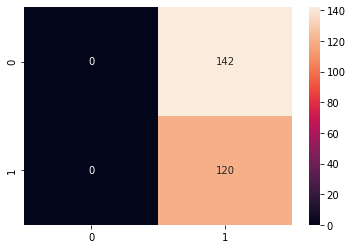

0.2 

Accuracy Score 0.4771
F1 Score 0.6366 

Confusion Matrix


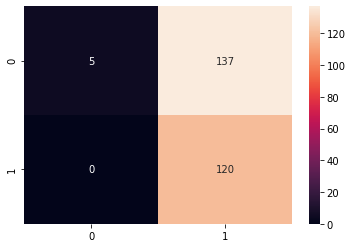

0.25 

Accuracy Score 0.4924
F1 Score 0.6356 

Confusion Matrix


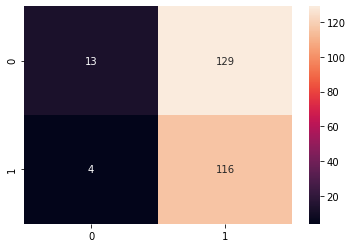

0.3 

Accuracy Score 0.5229
F1 Score 0.6356 

Confusion Matrix


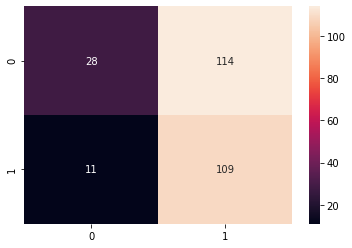

0.35 

Accuracy Score 0.5992
F1 Score 0.6535 

Confusion Matrix


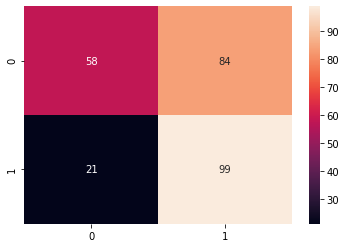

0.4 

Accuracy Score 0.6183
F1 Score 0.6241 

Confusion Matrix


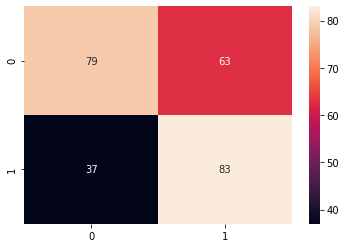

0.45 

Accuracy Score 0.6221
F1 Score 0.5639 

Confusion Matrix


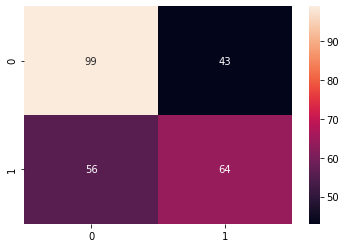

0.5 

Accuracy Score 0.6565
F1 Score 0.5455 

Confusion Matrix


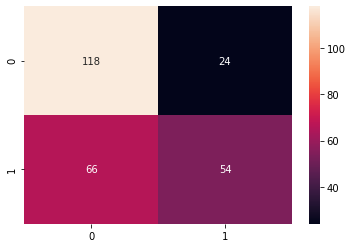

0.55 

Accuracy Score 0.645
F1 Score 0.4973 

Confusion Matrix


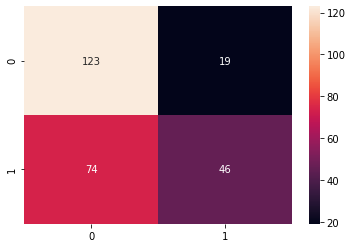

0.6 

Accuracy Score 0.6412
F1 Score 0.4659 

Confusion Matrix


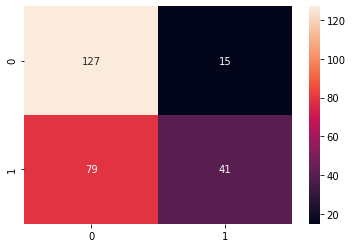

0.65 

Accuracy Score 0.6145
F1 Score 0.3804 

Confusion Matrix


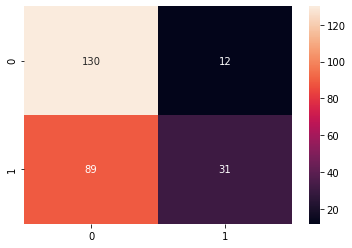

0.7 

Accuracy Score 0.6031
F1 Score 0.3067 

Confusion Matrix


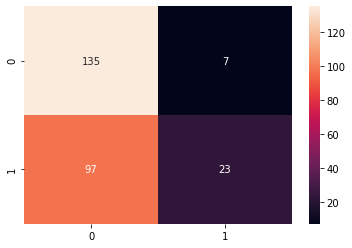

0.75 

Accuracy Score 0.5611
F1 Score 0.0945 

Confusion Matrix


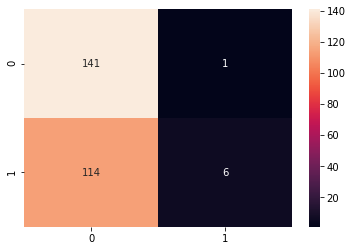

0.8 

Accuracy Score 0.542
F1 Score 0.0 

Confusion Matrix


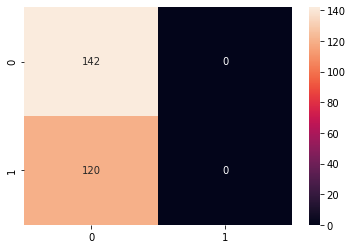

0.85 

Accuracy Score 0.542
F1 Score 0.0 

Confusion Matrix


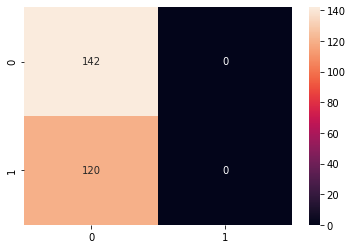

0.9 

Accuracy Score 0.542
F1 Score 0.0 

Confusion Matrix


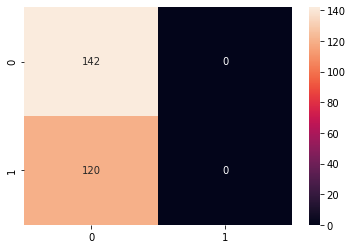

0.95 

Accuracy Score 0.542
F1 Score 0.0 

Confusion Matrix


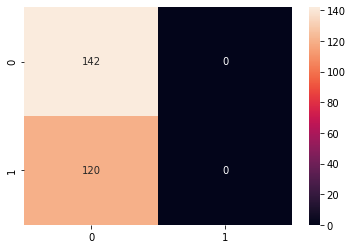

In [ ]:
for j in np.arange(0.1,1,0.05):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

AUC for the Training Data: 0.661


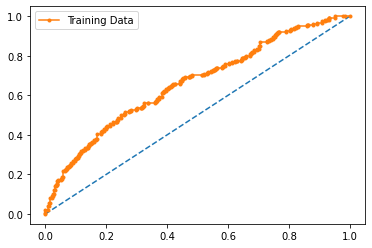

In [ ]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

plt.legend(loc='best')
plt.show()


AUC for the Test Data: 0.675


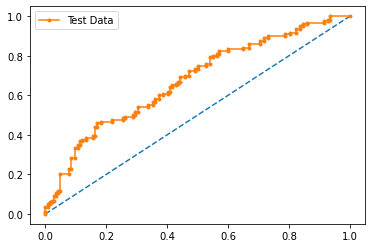

In [ ]:
# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.44
lda_train_f1  0.54


In [ ]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.69
lda_test_recall  0.45
lda_test_f1  0.55


In [ ]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[model.score(X_train,Y_train),lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.64,0.63,0.63,0.66
AUC,0.67,0.66,0.66,0.68
Recall,0.45,0.44,0.44,0.45
Precision,0.68,0.62,0.65,0.69
F1 Score,0.54,0.52,0.52,0.55
